<p>
    <font size="6"
          face= "Trebuchet MS";
          color="orange">
            <b>This notebook is created by: <a href="https://github.com/mahdi-khoshmaram">Mahdi khoshmaram</a> </b>
        </font>
        </p>

<h2> 1. Libraries to import </h2>

In [1]:
# first import all required libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
plt.style.use('seaborn')

<h2> 2. Creating datasets</h2>
<p> Two datasets created, <i>x1</i> with <b> one feature</b> and <i>x3</i> with <b>three features</b>. <p>

In [3]:
# Our datasets

# Dataset with 3 features
x3 = np.array([[1,5,9],[7,4,3],[11,6,5],[2,1,8]])
y3 = np.array([28,15,21,22])

#dataset with 1 feature
x1 = np.array([10,7,4,3,15])
y1 = np.array([5,3.5,2,1.5,7.5])

<h2> 3. Cost function  </h2>
<h4>3-1. Unvectorized cost function</h4>

In [4]:
# Unvectorized implementation of cost function with n-feature dataset for linear regression

def cost_unvec(x,y,w,b):
    m = x.shape[0]
    cost = 0 
    for i in range(m):
        cost = cost + ( (np.dot(x[i],w) + b) - y[i] ) ** 2
    cost = cost / (2 * m)
    return cost

<h4>3-1-1. Testing unvectorized cost function</h4>
<p>Creating dataset, <i>y1</i> produced by using parameters <b>w1=0.5</b> and <b>b1=0</b> and <i>y2</i> produced by using parameters <b>w3=[0,1,2]</b> and <b>b3=5</b></p>
<p>So the cost_unvec fonction should returns <b>0</b> for those values.</p>

In [5]:
# First Dataset 
w3 = np.array([0,1,2])
b3 = 5
print(f'w3 = {w3} , b3 = {b3}\ncost = {cost_unvec(x3,y3,w3,b3)}')

# Second dataset
w1 = 0.5
b1 = 0
print(f'\n\nw1 = {w1} , b1 = {b1}\ncost = {cost_unvec(x1,y1,w1,b1)}')

w3 = [0 1 2] , b3 = 5
cost = 0.0


w1 = 0.5 , b1 = 0
cost = 0.0


<h4>3-2. vectorized cost function</h4>

In [6]:
# Vectorized implementation of cost function with n-feature dataset for linear regression

def cost_vec(x,y,w,b):
    m = x.shape[0]
    error = np.sum(( (np.dot(x,w) + b) - y) ** 2)
    cost = error / (2 * m)
    return cost

<h4>3-2-1. Testing vectorized cost function</h4>
<p>Creating dataset, <i>y1</i> produced by using parameters <b>w1=0.5</b> and <b>b1=0</b> and <i>y2</i> produced by using parameters <b>w3=[0,1,2]</b> and <b>b3=5</b></p>
<p>So the cost_unvec fonction should returns <b>0</b> for those values.</p>

In [7]:
# First Dataset 
w3 = np.array([0,1,2])
b3 = 5
print(f'w3 = {w3} , b3 = {b3}\ncost = {cost_vec(x3,y3,w3,b3)}')

# Second dataset
w1 = 0.5
b1 = 0
print(f'\n\nw1 = {w1} , b1 = {b1}\ncost = {cost_vec(x1,y1,w1,b1)}')

w3 = [0 1 2] , b3 = 5
cost = 0.0


w1 = 0.5 , b1 = 0
cost = 0.0


<h2> 4.The derivative of the Cost function  </h2>
<h4>4-1. Calculating derivatives of the cost function <b>without</b> vectorization   </h4>

In [8]:
# Calculates the derivatives of cost function with respect to w and b
def dj_unvec(x,y,w,b):
    try:
        m,n = x.shape
    except:
        m = x.shape[0]
        x = x.reshape(m,1)
        n = 1
    
    dj_dw = np.zeros((n))
    dj_db = 0
    
# This part calculates the dj-dw
    for j in range(n):
        for i in range(m):
            dj_dw[j] = dj_dw[j] + ( ( (np.dot(x[i],w) + b) - y[i] ) * x[i,j])
    dj_dw = dj_dw / m

# This part calculates the dj-db
    for k in range(m):
        dj_db = dj_db + ( (np.dot(x[k],w) + b) - y[k] )
    dj_db = dj_db / m
        
    return dj_dw, dj_db

<h4>4-2. Calculating derivatives of the cost function <b>with</b> vectorization   </h4>

In [9]:
def dj_vec(x,y,w,b):
    try:
        m,n = x.shape
    except:
        m = x.shape[0]
    error = ( ( np.dot(x,w) + b) - y ) / m
    dj_dw = np.dot(error, x)
    dj_db = np.sum(error)
    return dj_dw , dj_db

<h2> 5.Gradien descent  </h2>
<p>Function <code>gradient_descent</code> below uses <b>automatic convergence</b> and it doesn't require any iteration value as input.</p>

In [10]:
def gradient_descent(x,y,w_init,b_init,alpha,epsilon,dj_func):
    try:
        m,n = x.shape
    except:
        m = x.shape[0]
        n = 1
        
    jlist = []
    iters = []
    
    w = w_init
    b = b_init
    
    i = 0
    
    while True:
        jlist.append(cost_vec(x,y,w,b))
        iters.append(i)
        
        i = i + 1
        
        #Prevoius_cost and present_cost are used for AUTOMATIC CONVERGENCE
        previous_cost = cost_vec(x,y,w,b)
        
        dj_dw,dj_db = dj_func(x,y,w,b)
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)
        
        present_cost = cost_vec(x,y,w,b)
        
        if abs(previous_cost - present_cost) < epsilon:
            break
    print(f'Iterations: {i}')
    return w,b,jlist,iters
            
            
        

<h2> 6. z-score normalization  </h2>
<p>Standard deviation and mean calculations are implemented rather than using numpy built-in functions like <code>mean()</code> and <code>std()</code>.</p>

In [11]:
def normalize(x):
    m = x.shape[0]
    
    try:
        n = x.shape[1]
    except:
        n = 1
    
    # Calculating mean
    sum = np.sum(x,0)  # Here 0 means that we want sum over each column
    mean = sum / m
    
    # Calulating standard deviation
    sigma = x - mean
    sigma = sigma ** 2
    sigma = np.sum(sigma,0)
    sigma = sigma /m
    sigma = np.sqrt(sigma)
    
    # Normalizing data
    x_norm = x - mean
    x_norm = x_norm / sigma
    
    return x_norm

<h2>7. Visualization</h2>

<p><b> <code>Visualizing X1/Y1</code></b></p>

In [12]:
x1_norm = normalize(x1)

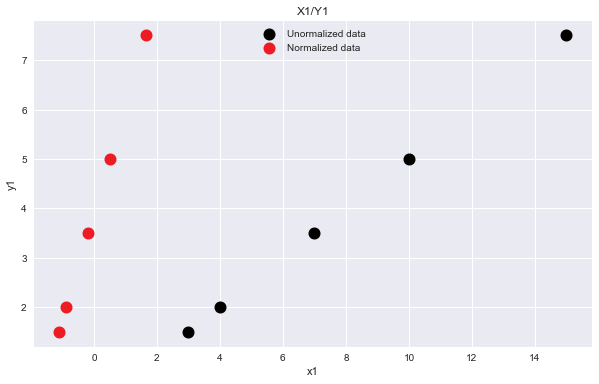

In [13]:
fig1, ax1 = plt.subplots(1,1,figsize=(10,6))
ax1.scatter(x1,y1,color = '#020100', linewidth = 5,label = 'Unormalized data')
ax1.scatter(x1_norm,y1,linewidth = 5, color = '#ED1C24',label = 'Normalized data')
ax1.set_title('X1/Y1')
ax1.set_xlabel('x1')
ax1.set_ylabel('y1')
ax1.legend(loc='upper center')


<p><b>7-1-1. Finding fitted Parameters</b>(<code>w</code>,<code>b</code>)</p>

<p>
    <font size="3"
          color="red">
            <b>Without normalization</b>
        </font>
        </p>

In [14]:
w1_initial = 0
b1_initial = 0
alpha = 1e-3
epsilon = 5e-15

w1,b1,j_history1,iters1 = gradient_descent(x1,y1,w1_initial,b1_initial,alpha,epsilon,dj_vec)
print(f'w1 = {w1}\nb1 = {b1}')

Iterations: 36301
w1 = 0.4999990733110404
b1 = 9.45278115434538e-06


<p>
    <font size="3"
          color="green">
            <b>With normalization</b>
        </font>
        </p>

In [15]:
w1_norm_initial = 0
b1_norm_initial = 0
alpha = 1e-3
epsilon = 5e-15

w1_norm,b1_norm,j_history1_norm,iters1_norm = gradient_descent(x1_norm,y1,w1_norm_initial,b1_norm_initial,alpha,epsilon,dj_vec)
print(f'w1_norm = {w1}\nb1_norm = {b1}')

Iterations: 14501
w1_norm = 0.4999990733110404
b1_norm = 9.45278115434538e-06


<p><b>7-1-2. Ploting J(w,b)/iteration</b></p>
<p>By plotting J(w,b)/iteration we can make sure that our gradiet descent function works correctly.</p>
<p>[Should: <b>1</b>-decrease after every iteration. <b>2</b>-Converge to a constant number]</p>

<p>
    <font size="3"
          color="red">
            <b>Without normalization</b>
        </font>
        </p>

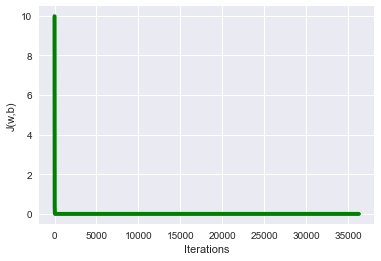

In [16]:
plt.plot(iters1,j_history1,linewidth = 4, color = 'green')
plt.xlabel('Iterations')
plt.ylabel('J(w,b)')
plt.show()

<p>
    <font size="3"
          color="green">
            <b>With normalization</b>
        </font>
        </p>

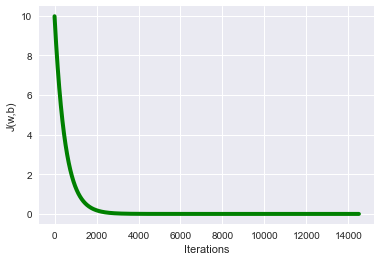

In [17]:
plt.plot(iters1_norm,j_history1_norm,linewidth = 4, color = 'green')
plt.xlabel('Iterations')
plt.ylabel('J(w,b)')
plt.show()

<p><b>7-1-3. Ploting J(w,b)/w</b></p>

<code>X1/Y1</code>

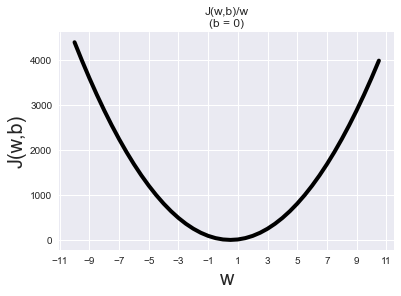

In [18]:
w_range = np.arange(-10,11,0.5)

b = 0

j_list1 = []

for w in w_range:
    j = cost_vec(x1,y1,w,b)
    j_list1.append(j)

j_list1 = np.asarray(j_list1)

plt.xticks(np.arange(-11,12,step=2))

plt.plot(w_range,j_list1,linewidth = 4, color = 'black')
plt.xlabel('w',fontsize= 20)
plt.ylabel('J(w,b)',fontsize= 20)
plt.title("J(w,b)/w\n(b = 0)")
plt.show()

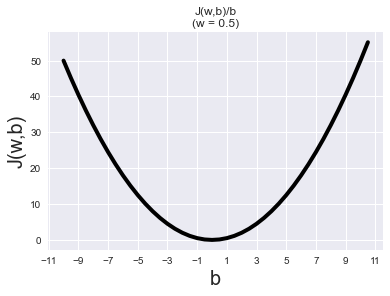

In [19]:
b_range = np.arange(-10,11,0.5)

w = 0.5

j_list2 = []

for b in b_range:
    j = cost_vec(x1,y1,w,b)
    j_list2.append(j)

j_list2 = np.asarray(j_list2)

plt.xticks(np.arange(-11,12,step=2))

plt.plot(b_range,j_list2,linewidth = 4, color = 'black')
plt.xlabel('b',fontsize= 20)
plt.ylabel('J(w,b)',fontsize= 20)
plt.title("J(w,b)/b\n(w = 0.5)")
plt.show()

<p><b>7-1-4. Ploting data and our linear model</b> <code>X1/Y1</code></p>

<p>
    <font size="3"
          color="red">
            <b>Without normalization</b>
        </font>
        </p>

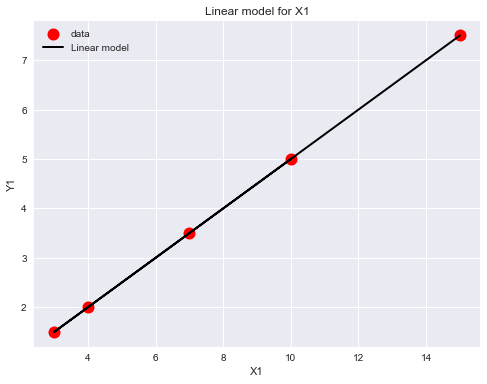

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(x1,y1,color = 'red', linewidth = 5,label = 'data')
plt.plot(x1,(np.dot(x1,w1) + b1), color ='black', linewidth= 2,label = 'Linear model')
plt.xlabel('X1')
plt.ylabel('Y1')
plt.title('Linear model for X1')
plt.legend()
plt.show()

<p>
    <font size="3"
          color="green">
        <b>With normalization</b>
        </font>
        </p>

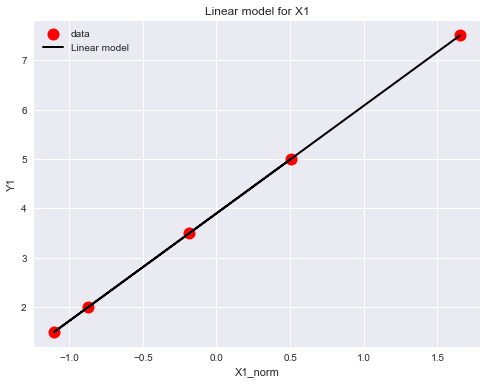

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(x1_norm,y1,color = 'red', linewidth = 5,label = 'data')
plt.plot(x1_norm,(np.dot(x1_norm,w1_norm) + b1_norm), color ='black', linewidth= 2,label = 'Linear model')
plt.title('Linear model for X1')
plt.xlabel('X1_norm')
plt.ylabel('Y1')
plt.legend()
plt.show()

<p><b> <code>Visualizing X3/Y3</code></b></p>

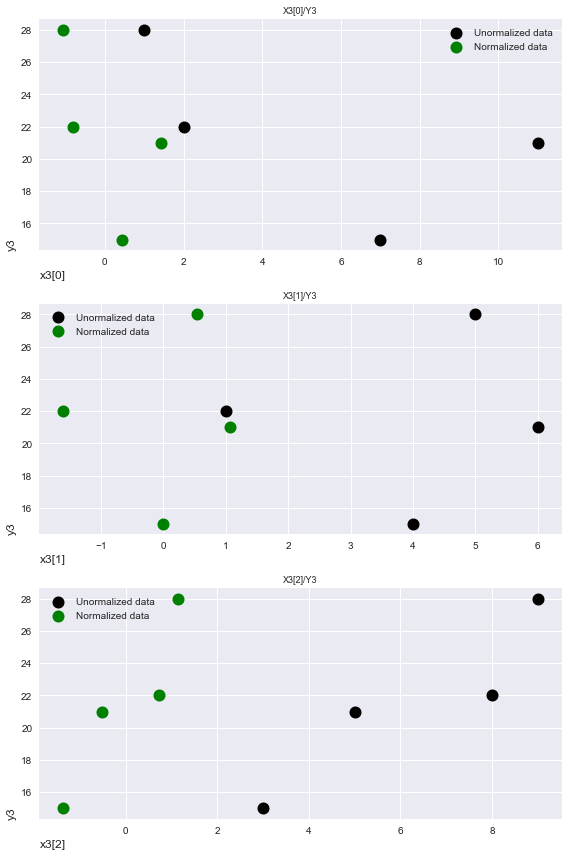

In [22]:
x3_norm = normalize(x3)

fig3, ax3 = plt.subplots(3,1,figsize=(8,12),sharey=True)

#ax3[0]/y3
ax3[0].scatter(x3[:,0], y3, color = '#020100', linewidth = 5, label = 'Unormalized data')
ax3[0].scatter(x3_norm[:,0], y3,linewidth = 5, color = 'green', label = 'Normalized data')
ax3[0].set_title('X3[0]/Y3', fontsize= 9)
ax3[0].set_xlabel('x3[0]',loc='left',fontsize= 12)
ax3[0].set_ylabel('y3', loc= 'bottom',fontsize= 12)
ax3[0].legend(loc='upper right')

#ax3[1]/y3
ax3[1].scatter(x3[:,1], y3, color = '#020100', linewidth = 5, label = 'Unormalized data')
ax3[1].scatter(x3_norm[:,1], y3,linewidth = 5, color = 'green', label = 'Normalized data')
ax3[1].set_title('X3[1]/Y3',fontsize= 9)
ax3[1].set_xlabel('x3[1]',loc='left',fontsize= 12)
ax3[1].set_ylabel('y3',loc= 'bottom',fontsize= 12)
ax3[1].legend(loc='upper left')

#ax3[2]/y3
ax3[2].scatter(x3[:,2], y3, color = '#020100', linewidth = 5, label = 'Unormalized data')
ax3[2].scatter(x3_norm[:,2], y3,linewidth = 5, color = 'green', label = 'Normalized data')
ax3[2].set_title('X3[2]/Y3',fontsize= 9)
ax3[2].set_xlabel('x3[2]',loc='left',fontsize= 12)
ax3[2].set_ylabel('y3',loc= 'bottom',fontsize= 12)
ax3[2].legend(loc='upper left',)

plt.tight_layout()

<p><b>7-2-1. Finding fitted Parameters</b>(<code>w</code>,<code>b</code>)</p>

<p>
    <font size="3"
          color="red">
            <b>Without normalization</b>
        </font>
        </p>

In [23]:
w3_initial = [0,0,0]
b3_initial = 0
alpha = 1e-3
epsilon = 1e-15

w3,b3,j_history3,iters3 = gradient_descent(x3,y3,w3_initial,b3_initial,alpha,epsilon,dj_vec)
print(f'w3 = {w3}\nb3 = {b3}')

Iterations: 451306
w3 = [2.30950451e-06 9.99999806e-01 2.00000414e+00]
b3 = 4.99996179866597


<p>
    <font size="3"
          color="green">
            <b>With normalization</b>
        </font>
        </p>

In [24]:
w3_norm_initial = [0,0,0]
b3_norm_initial = 0
alpha = 1e-3
epsilon = 1e-15

w3_norm,b3_norm,j_history3_norm,iters3_norm = gradient_descent(x3_norm,y3,w3_norm_initial,b3_norm_initial,alpha,epsilon,dj_vec)
print(f'w3_norm = {w3_norm}\nb3_norm = {b3_norm}')

Iterations: 85925
w3_norm = [-5.04685022e-06  1.87083072e+00  4.76969201e+00]
b3_norm = 21.499999999998227


<p><b>7-2-2. Ploting J(w,b)/iteration</b></p>
<p>By plotting J(w,b)/iteration we can make sure that our gradiet descent function works correctly.</p>
<p>[Should: <b>1</b>-decrease after every iteration. <b>2</b>-Converge to a constant number]</p>

<p>
    <font size="3"
          color="red">
            <b>Without normalization</b>
        </font>
        </p>

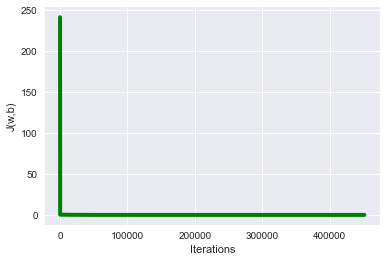

In [25]:
plt.plot(iters3,j_history3,linewidth = 4, color = 'green')
plt.xlabel('Iterations')
plt.ylabel('J(w,b)')
plt.show()

<p>
    <font size="3"
          color="green">
            <b>With normalization</b>
        </font>
        </p>

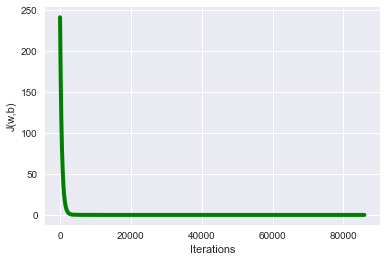

In [26]:
plt.plot(iters3_norm,j_history3_norm,linewidth = 4, color = 'green')
plt.xlabel('Iterations')
plt.ylabel('J(w,b)')
plt.show()

<h2>8. Wraping all functions above up in <code>Scikit learn</code> library </h2>

In [27]:
#Creat the scaler handle for StandardScaler
scaler = StandardScaler()

#Creat the sgdr handle for SGDRegressor
sgdr = SGDRegressor(max_iter= 20000)

In [28]:
#Fit-transform method first finds average and standard deviation and then does the normalization 
x1_norm_sk = scaler.fit_transform(x1.reshape(-1,1))
x3_norm_sk = scaler.fit_transform(x3)

print(f'Scikit learn = {x1_norm_sk.reshape(len(x1))}\nnormilize(x1) = {normalize(x1)}')

print(f'\n\n\n\nScikitlearn =\n {x3_norm_sk}\n\nnormilize(x3) =\n {normalize(x3)}')

Scikit learn = [ 0.50524673 -0.18372608 -0.8726989  -1.10235651  1.65353476]
normilize(x1) = [ 0.50524673 -0.18372608 -0.8726989  -1.10235651  1.65353476]




Scikitlearn =
 [[-1.0563286   0.53452248  1.15311332]
 [ 0.43495884  0.         -1.36277029]
 [ 1.42915046  1.06904497 -0.52414242]
 [-0.8077807  -1.60356745  0.73379939]]

normilize(x3) =
 [[-1.0563286   0.53452248  1.15311332]
 [ 0.43495884  0.         -1.36277029]
 [ 1.42915046  1.06904497 -0.52414242]
 [-0.8077807  -1.60356745  0.73379939]]


<code>X1</code>

In [29]:
#Using fit method from SGDRegressor to train our model's parameters 
sgdr.fit(x1.reshape(-1,1),y1)

#Fit parameters associated with the normalized input data
w1_sk = sgdr.coef_
b1_sk = sgdr.intercept_

print(f'Scikitlearn: w1 = {w1_sk} , b1 = {b1_sk}\nOur gradient descent function: w1 = {w1} , b1 = {b1}')



#normalized
sgdr.fit(x1_norm.reshape(-1,1),y1)

#Fit parameters associated with the normalized input data
w1_norm_sk = sgdr.coef_
b1_norm_sk = sgdr.intercept_

print(f'\n\n\nScikitlearn: w1_norm = {w1_norm_sk} , b1_norm = {b1_norm_sk}\nOur gradient descent function: w1_norm = {w1_norm} , b1_norm = {b1_norm}')

Scikitlearn: w1 = [0.49913186] , b1 = [0.00911565]
Our gradient descent function: w1 = 0.4999990733110404 , b1 = 9.45278115434538e-06



Scikitlearn: w1_norm = [2.02106619] , b1_norm = [3.61810608]
Our gradient descent function: w1_norm = 2.177153016692543 , b1_norm = 3.8999980492151542


<code>X3</code>

In [30]:
#Using fit method from SGDRegressor to train our model's parameters 
sgdr.fit(x3,y3)

#Fit parameters associated with the normalized input data
w3_sk = sgdr.coef_
b3_sk = sgdr.intercept_

print(f'Scikitlearn: w3 = {w3_sk} , b3 = {b3_sk}\nOur gradient descent function: w3 = {w3} , b3 = {b3}')



#normalized
sgdr.fit(x3_norm,y3)

#Fit parameters associated with the normalized input data
w3_norm_sk = sgdr.coef_
b3_norm_sk = sgdr.intercept_

print(f'\n\n\nScikitlearn: w3_norm = {w3_norm_sk} , b3_norm = {b3_norm_sk}\nOur gradient descent function: w1_norm = {w3_norm} , b3_norm = {b3_norm}')

Scikitlearn: w3 = [0.24961311 1.01069043 2.48575681] , b3 = [0.43058577]
Our gradient descent function: w3 = [2.30950451e-06 9.99999806e-01 2.00000414e+00] , b3 = 4.99996179866597



Scikitlearn: w3_norm = [-0.90333714  2.09012659  3.93450077] , b3_norm = [21.17288293]
Our gradient descent function: w1_norm = [-5.04685022e-06  1.87083072e+00  4.76969201e+00] , b3_norm = 21.499999999998227
